In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import easyocr

# import os,sys
# from paddleocr import PaddleOCR, draw_ocr

In [4]:
# Specify language to identify from images
reader = easyocr.Reader(['en','nl'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [5]:
# Load images
images = [cv2.imread(file) for file in glob.glob("Data/StreetSwipe/all_images/*.jpg")]
print(f"Total number of images: {len(images)}")

Total number of images: 2441


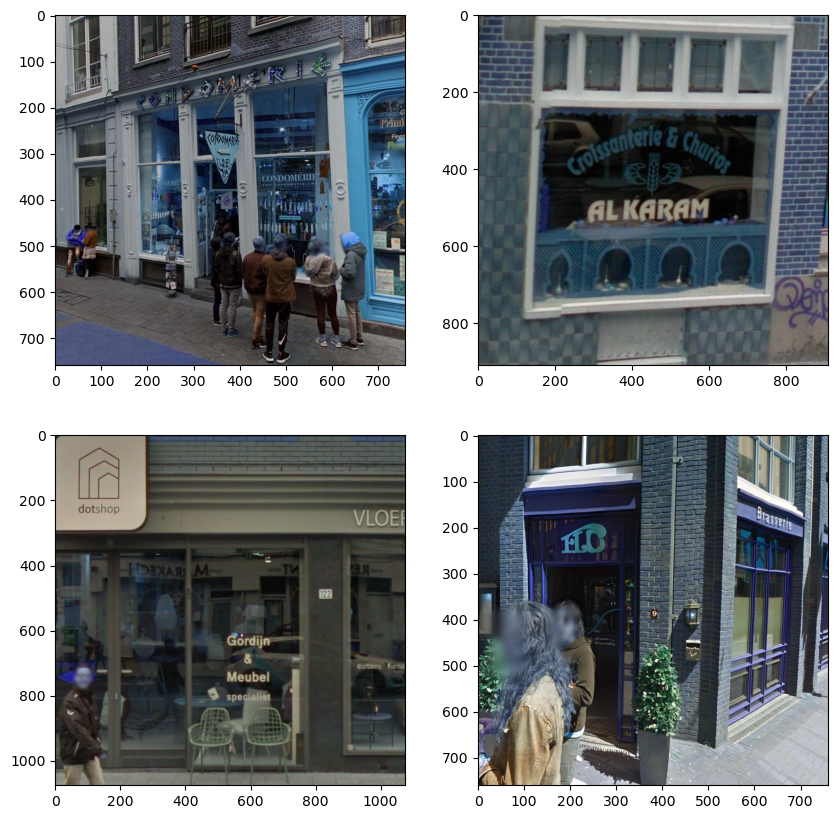

In [56]:
# Sample image

test_img = [images[i] for i in np.random.randint(2441, size =(4))]

# plt.figure(figsize=(10,10))
# plt.imshow(test_img)
# plt.show()

fig = plt.figure(figsize=(10,10))
rows, cols = 2, 2

for i in range(0, cols*rows):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(test_img[i])
plt.show()

In [58]:
for img in test_img:
    result = reader.detect(img)
# result

In [59]:
result

([[[172, 285, 192, 265]]],
 [[[[605.3026573907705, 144.04886747447082],
    [696.9960047936089, 186.80015980825564],
    [678.6973426092295, 224.95113252552918],
    [587.0039952063911, 183.19984019174436]]]])

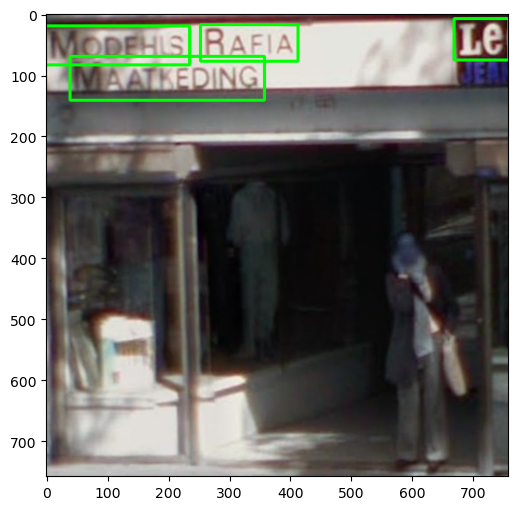

In [51]:
result_vis = test_img
spacer = 100

for detection in result[0][0]: 
    top_left = (box[0], box[2])
    bottom_right = (box[1], box[3])
    result_vis = cv2.rectangle(result_vis,top_left,bottom_right,(0,255,0),3)
    spacer+=15

for detection in result[1][0]: 
    top_left = tuple(int(i) for i in detection[0])
    bottom_right = tuple(int(i) for i in detection[2])
    result_vis = cv2.rectangle(result_vis,top_left,bottom_right,(0,255,0),3)
    spacer+=15

plt.figure(figsize=(6,6))
plt.imshow(result_vis)
plt.show()